# Data Loading and Initial Exploration

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Loading the Dataset
df=pd.read_excel(r"E:\DS_Assignment\ExcelR\Clustering\marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Data Preprocessing

In [12]:
#Handling the missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
df.dropna(subset=['Income'], inplace=True)

In [14]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df.shape

(2216, 29)

In [16]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


# 3. Exploratory Data Analysis (EDA)¶

## 3.1. Univariate Analysis

### Summary Statistics for Numerical Attributes

In [17]:
# Calculate summary statistics for specific numerical attributes
specific_summary_stats = df[['Year_Birth', 'Income', 'Recency']].describe()

In [18]:
specific_summary_stats

,Year_Birth,Income,Recency
count,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635
std,11.985554,25173.076661,28.948352
min,1893.000000,1730.000000,0.000000
25%,1959.000000,35303.000000,24.000000
50%,1970.000000,51381.500000,49.000000
75%,1977.000000,68522.000000,74.000000
max,1996.000000,666666.000000,99.000000


### Frequency Counts for Categorical Attributes

In [19]:
# Count the frequency of each category in categorical attributes
education_counts = df['Education'].value_counts()
marital_status_counts = df['Marital_Status'].value_counts()


In [20]:
# Display the frequency of each category
print("Education:")
print(education_counts)
print("\nMarital Status:")
print(marital_status_counts)

Education:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Marital Status:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


#  Box Plots and Visualization

## Box Plots for Numerical Attributes

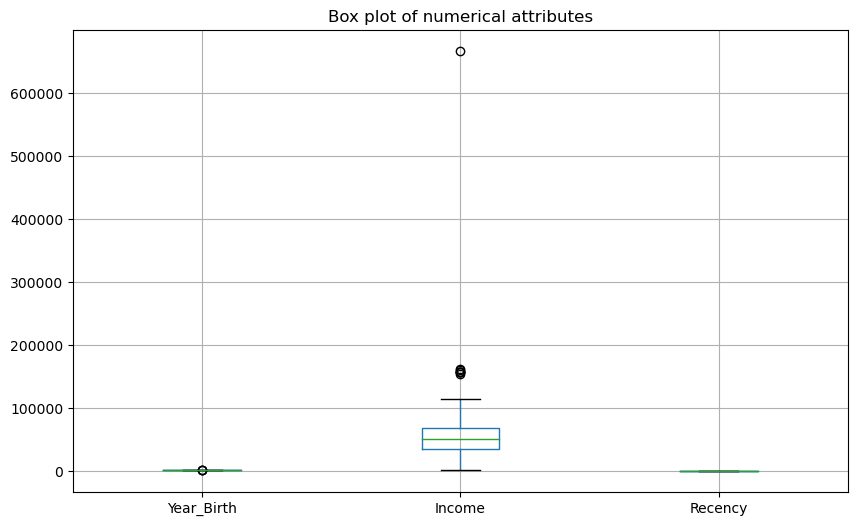

In [21]:
#  box plots for numerical attributes to identify outliers
numerical_attributes = ['Year_Birth', 'Income', 'Recency']
plt.figure(figsize=(10, 6))
df[numerical_attributes].boxplot()
plt.title("Box plot of numerical attributes")
plt.show()

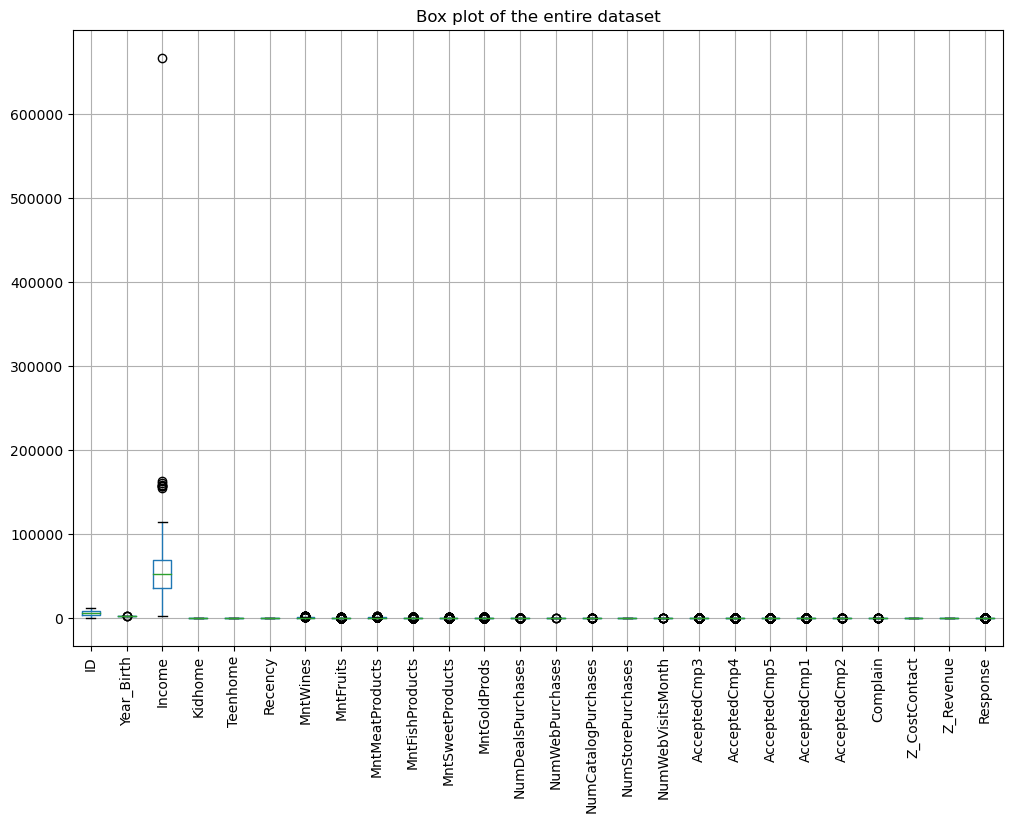

In [22]:
## Box Plot of the Entire Dataset
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Box plot of the entire dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
plt.show()

### Composition of Spending on Products (Pie Chart)

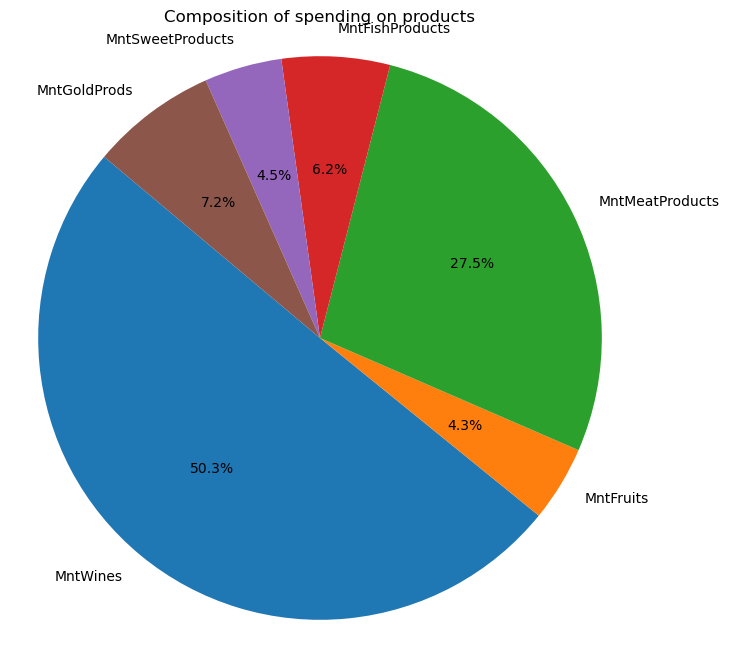

In [23]:
# Calculate total spending on each product category
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df[product_categories].sum()

# Create a pie chart to visualize the composition of spending on products
plt.figure(figsize=(8, 8))
plt.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=140)
plt.title("Composition of spending on products")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Total Purchases through Different Channels (Bar Plot)

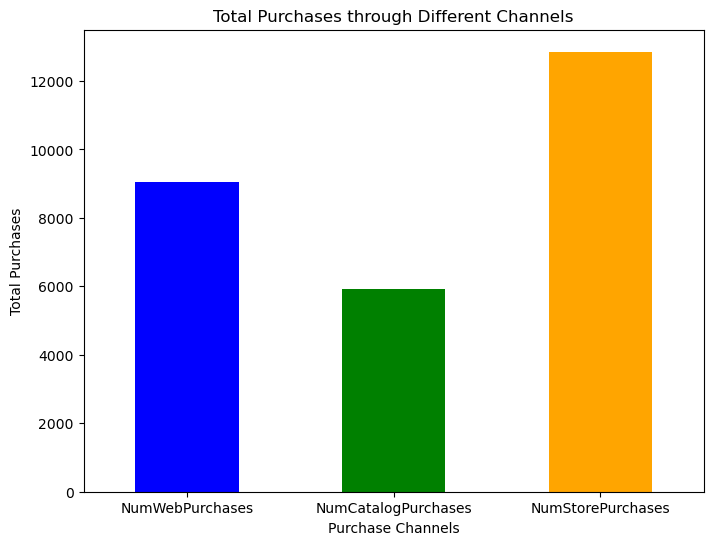

In [24]:
# Calculate total purchases through each channel
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purchases = df[purchase_channels].sum()

# Create a bar plot to visualize total purchases through each channel
plt.figure(figsize=(8, 6))
total_purchases.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title("Total Purchases through Different Channels")
plt.xlabel("Purchase Channels")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.show()

### Distribution of Customer Responses (Histogram)

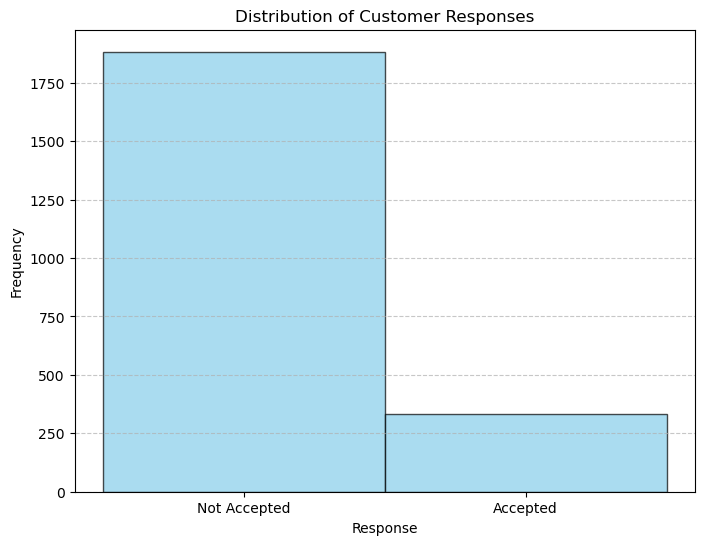

In [25]:
# Create a histogram to visualize the distribution of responses
plt.figure(figsize=(8, 6))
plt.hist(df['Response'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Customer Responses")
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.xticks([0.25, 0.75], ['Not Accepted', 'Accepted'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribution of Purchases Made through Different Channels (Box Plot)

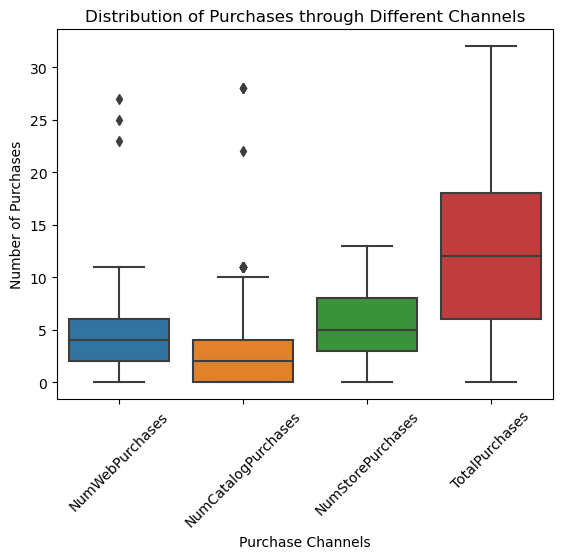

In [26]:
# Distribution of purchases made through different channels
purchase_attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_purchases = df[purchase_attributes]
df_purchases['TotalPurchases'] = df_purchases.sum(axis=1)
sns.boxplot(data=df_purchases)
plt.title('Distribution of Purchases through Different Channels')
plt.xlabel('Purchase Channels')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### Distribution of Income(Histogram)

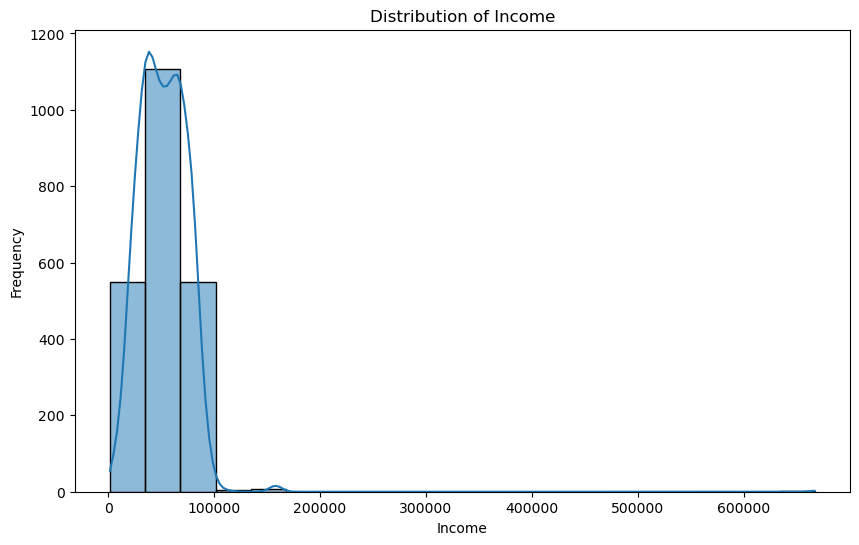

In [27]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

## 3.2. Bivariate Analysis

### Pairplot of Numerical Attributes

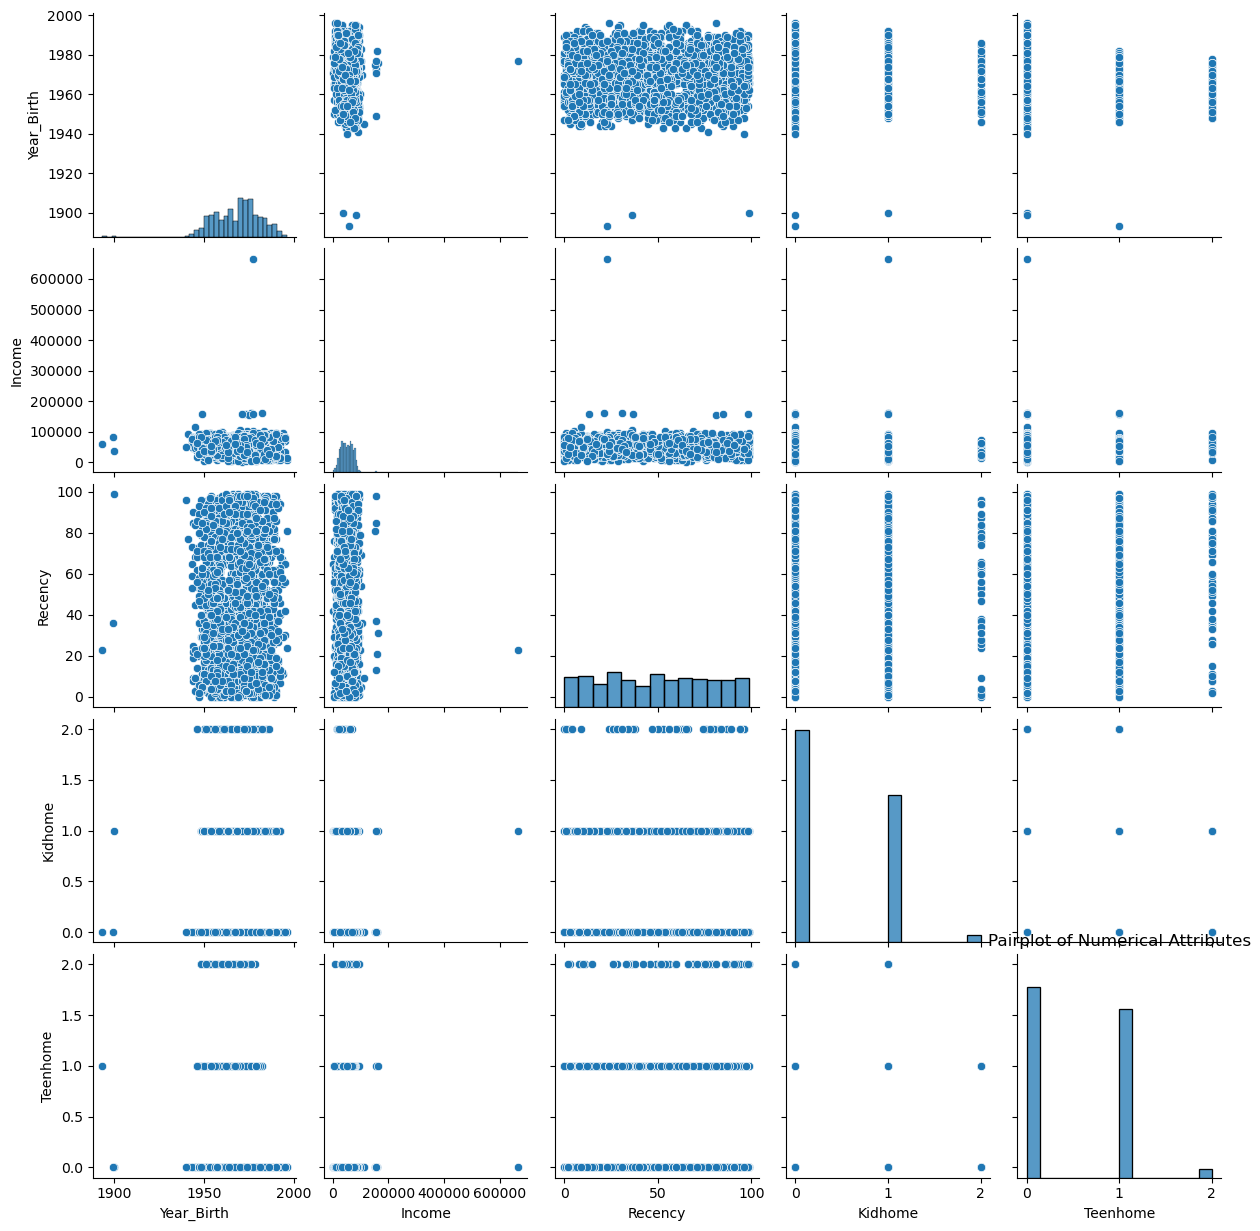

In [28]:
# Pairplot of Selected Numerical Attributes with hue for Complain
numerical_attributes = ['Year_Birth', 'Income', 'Recency', 'Kidhome', 'Teenhome']
sns.pairplot(df[numerical_attributes])
plt.title('Pairplot of Numerical Attributes')
plt.show()

### Correlation Between Accepting Offers in Different Campaigns (Heatmap)

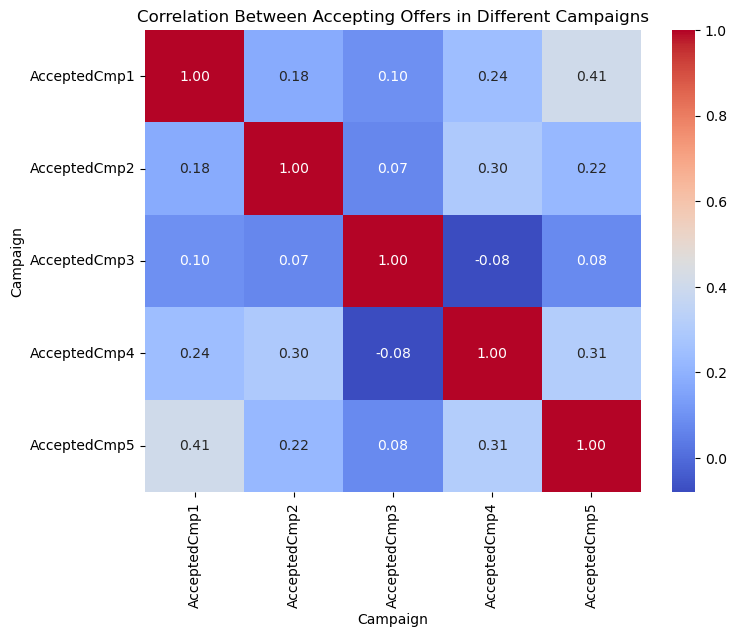

In [29]:
# Select the columns representing acceptance of offers in each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the correlation matrix
correlation_matrix = df[campaigns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Accepting Offers in Different Campaigns")
plt.xlabel("Campaign")
plt.ylabel("Campaign")
plt.show()

## Feature Engineering and Encoding

In [30]:
# Create a new feature representing total amount spent on products
df['TotalAmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [31]:
# Convert the date column to datetime data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract year, month, and day into separate columns
df['Year_Customer'] = df['Dt_Customer'].dt.year

In [32]:
# Drop the original date column if needed
df.drop('Dt_Customer', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,Year_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,3,11,1,1617,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,27,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,3,11,0,776,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,53,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,422,2014


In [33]:
# Drop the original date column if needed
df.drop(['ID','Year_Birth','Z_CostContact','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,Year_Customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,1617,2012
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,27,2014
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,776,2013
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,53,2014
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,422,2014


In [34]:
# Create a new column representing the total number of promotions accepted
df['TotalPromotionsAccepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [35]:
# Create a new column representing the total number of children in the household
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

## Label Encoding of Categorical Variables

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [38]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,Year_Customer,TotalPromotionsAccepted,TotalChildren
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,1617,2012,0,0
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,27,2014,0,2
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,776,2013,0,0
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,53,2014,0,1
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,422,2014,0,1


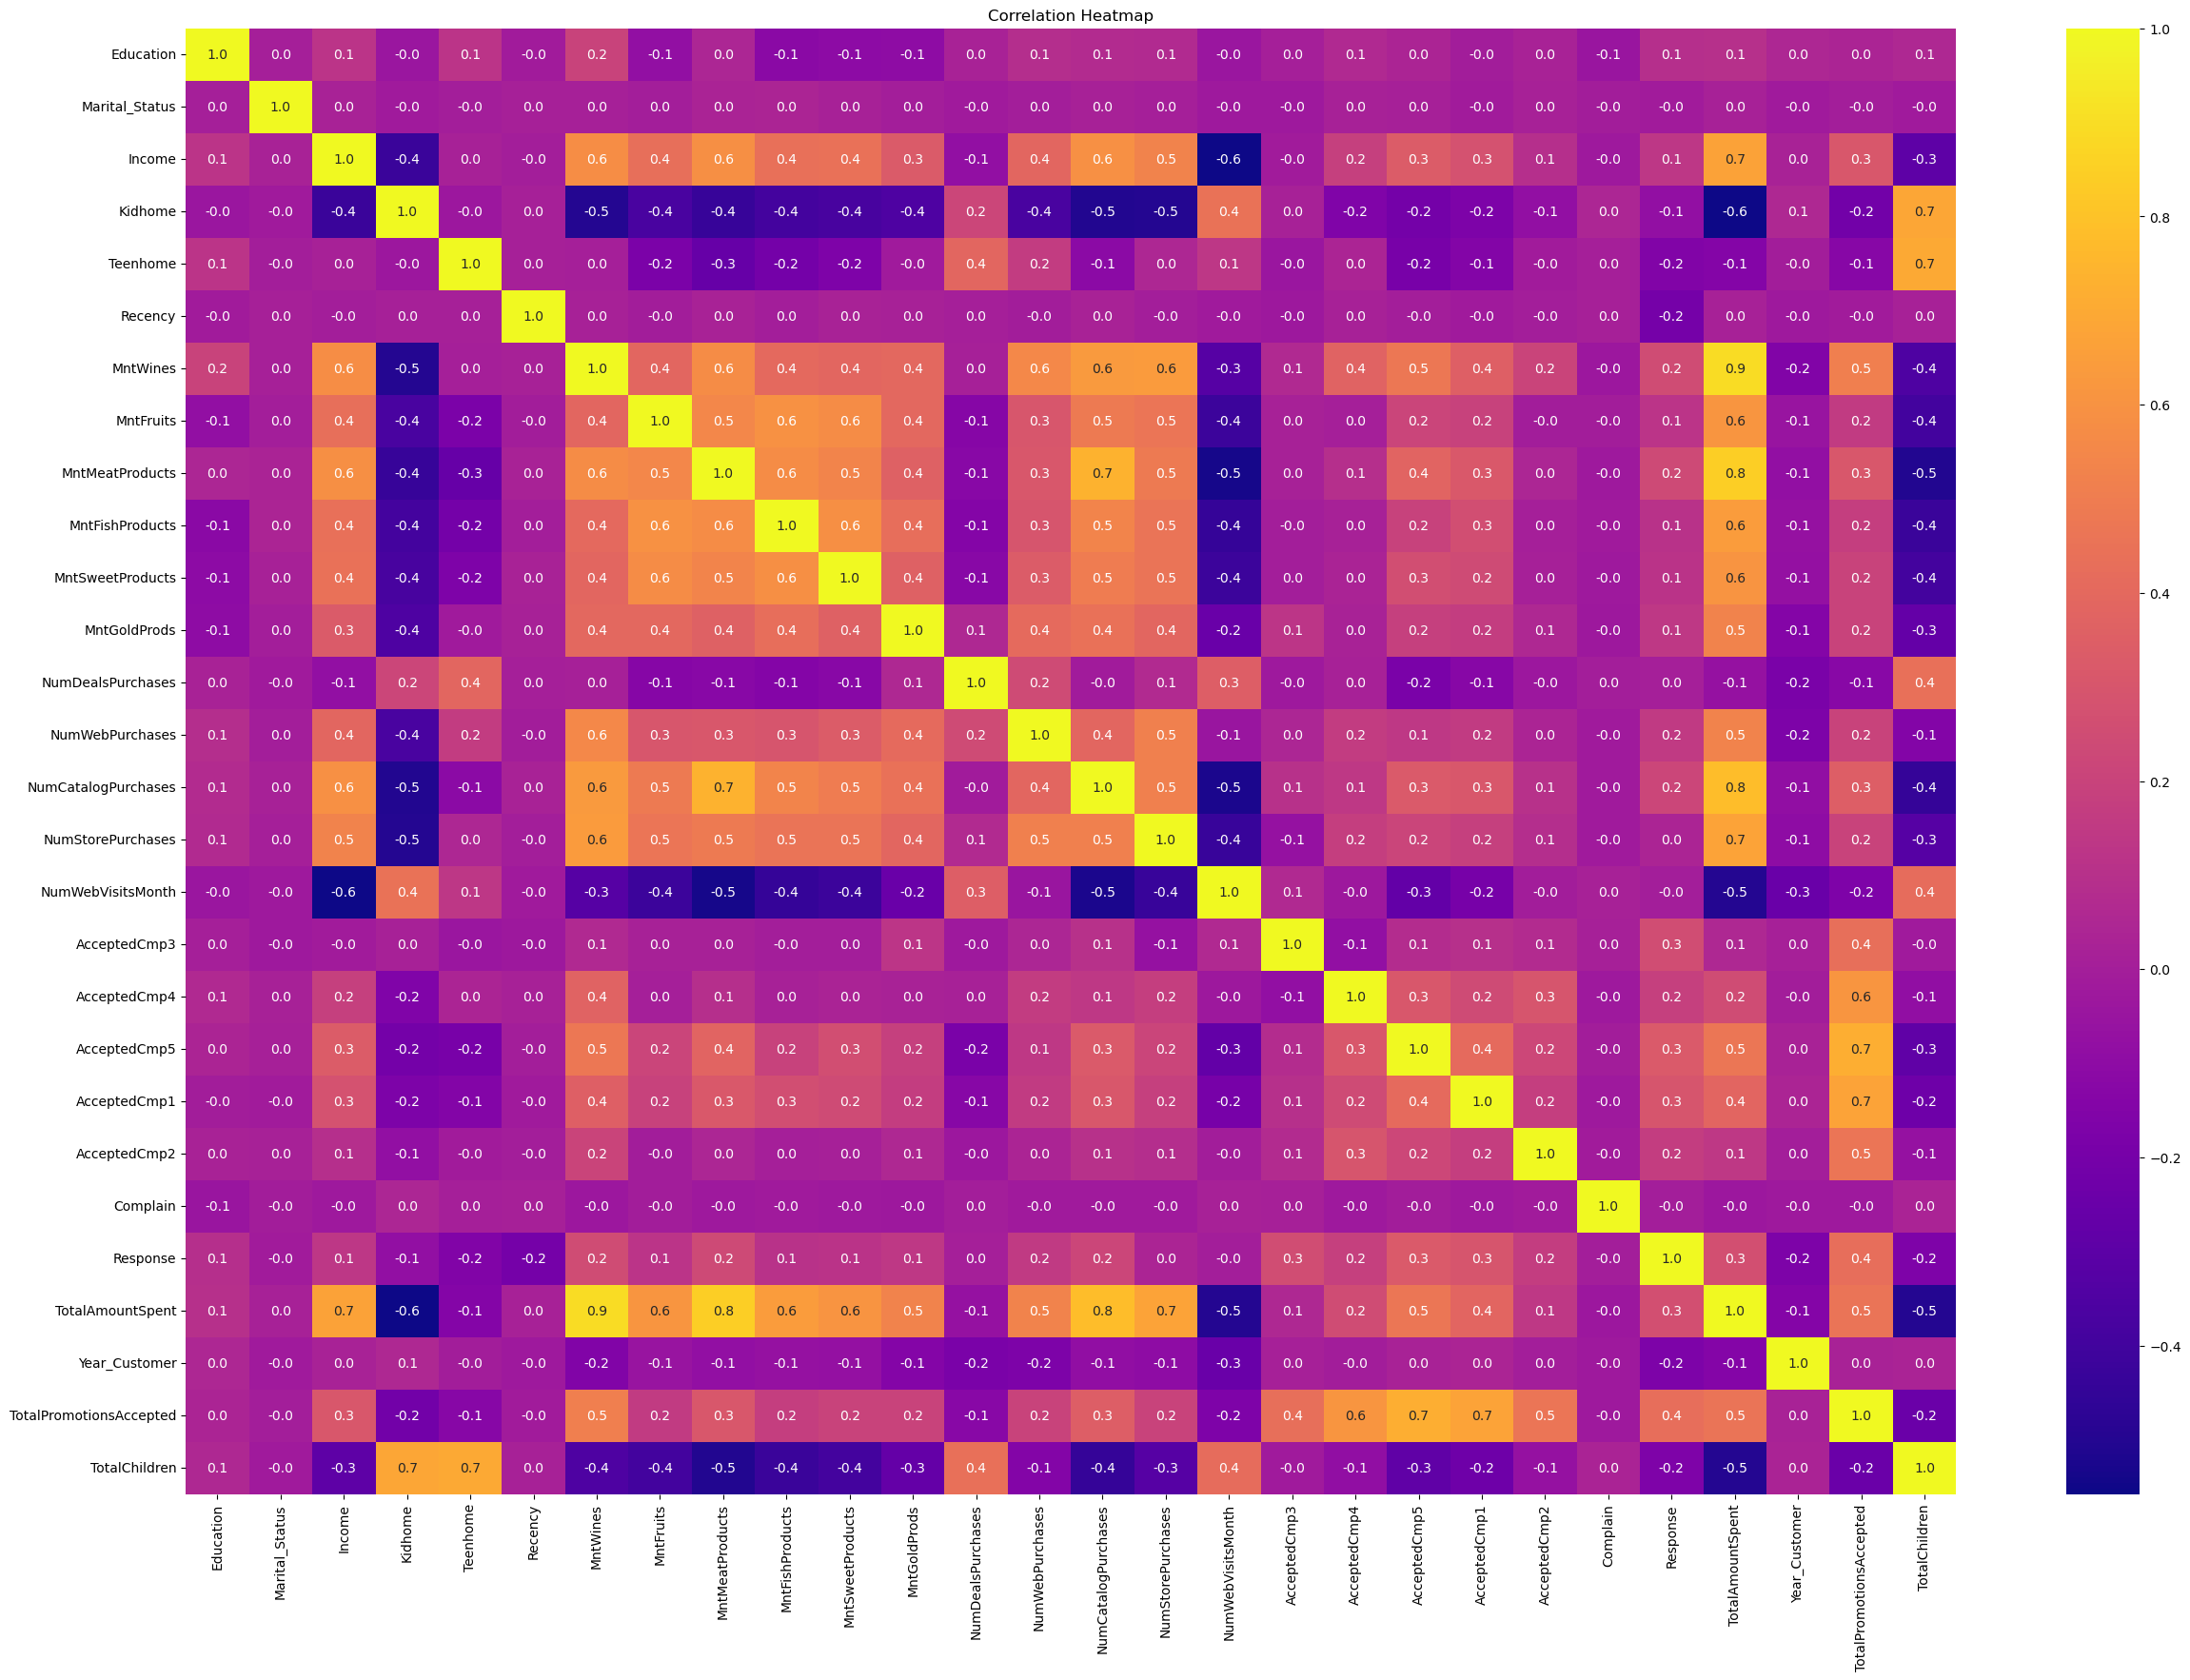

In [39]:
# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

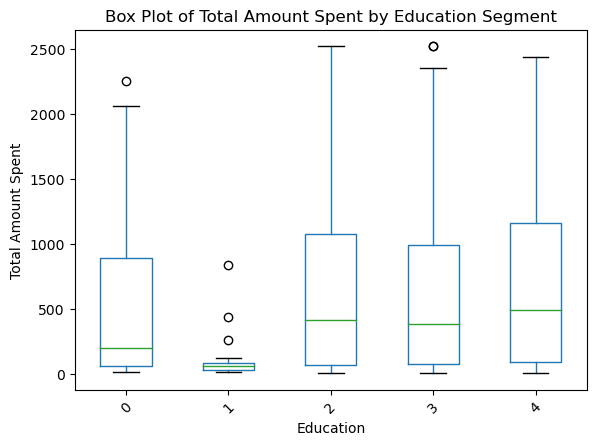

In [40]:
# Create box plots to compare distributions across education segments
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='TotalAmountSpent', by='Education', grid=False)
plt.title("Box Plot of Total Amount Spent by Education Segment")
plt.suptitle("")  # Remove the default title created by pandas
plt.xlabel("Education")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

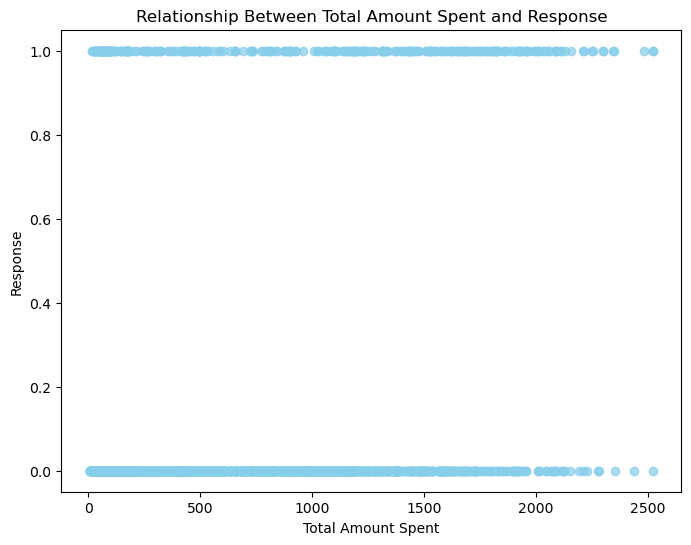

In [41]:
#scatter plots to visualize the relationship between Response and TotalAmountSpent
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalAmountSpent'], df['Response'], color='skyblue', alpha=0.7)
plt.title("Relationship Between Total Amount Spent and Response")
plt.xlabel("Total Amount Spent")
plt.ylabel("Response")
plt.show()

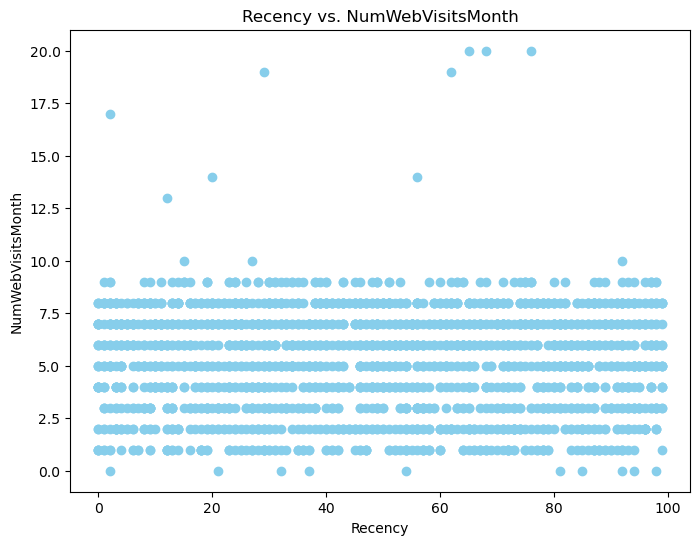

In [42]:
# Scatter plot of Recency vs. NumWebVisitsMonth
plt.figure(figsize=(8, 6))
plt.scatter(df['Recency'], df['NumWebVisitsMonth'], color='skyblue')
plt.title("Recency vs. NumWebVisitsMonth")
plt.xlabel("Recency")
plt.ylabel("NumWebVisitsMonth")
plt.show()

In [43]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,Year_Customer,TotalPromotionsAccepted,TotalChildren
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,1617,2012,0,0
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,27,2014,0,2
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,776,2013,0,0
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,53,2014,0,1
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,422,2014,0,1


# Standardizing Numerical Features with StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.35052725,  0.25421812,  0.2340627 , ..., -1.50034282,
        -0.43926491, -1.26480327],
       [-0.35052725,  0.25421812, -0.23455948, ...,  1.41739276,
        -0.43926491,  1.40580564],
       [-0.35052725,  1.18230273,  0.76947764, ..., -0.04147503,
        -0.43926491, -1.26480327],
       ...,
       [-0.35052725, -1.60195109,  0.18809052, ...,  1.41739276,
         1.03336905, -1.26480327],
       [ 0.53924181,  1.18230273,  0.67538765, ...,  1.41739276,
        -0.43926491,  0.07050118],
       [ 1.42901088, -0.67386649,  0.02470453, ..., -1.50034282,
        -0.43926491,  1.40580564]])

# Dimensionality Reduction with PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
model = PCA(n_components=28)

In [48]:
model.fit_transform(scaled_data)

array([[ 4.12609604e+00, -1.30048260e+00,  3.85884139e-01, ...,
         3.48400940e-14, -1.44412061e-15, -8.84535553e-17],
       [-2.97824574e+00,  1.25603316e-01, -3.71688248e-01, ...,
         1.92678222e-16,  9.54627064e-17, -1.53224401e-16],
       [ 1.69545420e+00, -1.54469738e+00, -4.52397175e-01, ...,
        -1.86961659e-15,  7.90994758e-15,  6.11557232e-15],
       ...,
       [ 2.19541471e+00,  1.00946064e+00, -5.81422755e-01, ...,
         1.78183030e-16, -3.46294043e-16, -4.37535704e-18],
       [ 1.44687719e+00, -1.28263167e+00,  7.69477704e-01, ...,
        -7.99818728e-16, -9.01834986e-17, -5.39384010e-17],
       [-2.13989204e+00,  1.15048655e+00,  1.32187016e+00, ...,
        -1.05533067e-15,  7.74163492e-17,  2.31742403e-17]])

### Explained Variance Ratio:

In [49]:
var  = model.explained_variance_ratio_
var

array([2.88005596e-01, 9.08683246e-02, 8.13121878e-02, 5.41748363e-02,
       4.24300212e-02, 4.14291073e-02, 3.59777179e-02, 3.57654422e-02,
       3.56423574e-02, 3.45584455e-02, 2.78079833e-02, 2.47291679e-02,
       2.33090590e-02, 2.23175884e-02, 2.15261379e-02, 2.06797535e-02,
       1.93197762e-02, 1.67379969e-02, 1.51407544e-02, 1.51029204e-02,
       1.39645869e-02, 1.28087381e-02, 1.03565073e-02, 8.47880198e-03,
       7.55619222e-03, 5.67990887e-32, 3.13731816e-33, 2.44441737e-33])

### Cumulative Explained Variance:

In [50]:
np.cumsum(var)

array([0.2880056 , 0.37887392, 0.46018611, 0.51436094, 0.55679097,
       0.59822007, 0.63419779, 0.66996323, 0.70560559, 0.74016404,
       0.76797202, 0.79270119, 0.81601025, 0.83832783, 0.85985397,
       0.88053373, 0.8998535 , 0.9165915 , 0.93173225, 0.94683517,
       0.96079976, 0.9736085 , 0.98396501, 0.99244381, 1.        ,
       1.        , 1.        , 1.        ])

### Final Dimensionality Reduction

In [89]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,4.126096,-1.300517
1,-2.978246,0.125609
2,1.695454,-1.544717
3,-2.611529,-0.021906
4,-0.618563,-0.625375
...,...,...
2211,2.338048,-1.503860
2212,-1.489838,2.591018
2213,2.195415,1.009478
2214,1.446877,-1.282652


# K-Means Clustering

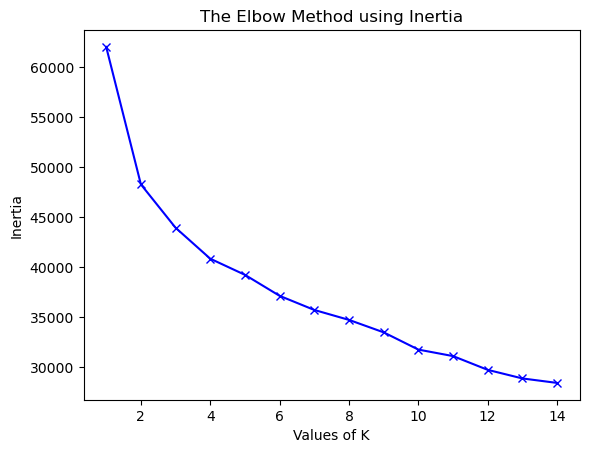

In [86]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_data))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [92]:
#from sklearn.cluster import KMeans

In [93]:
#model = KMeans(n_clusters=4)
#model.fit(pca_data)

### Within-Cluster Sum of Squares (WCSS)

In [54]:
# The WCSS value for the model
model.inertia_

29521.289020097174

In [55]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [56]:
wcss

[62048.0,
 48307.528009955786,
 43971.03112135779,
 40874.30441572731,
 39265.868717143814,
 37170.82001696035,
 36065.638441234594,
 33795.90933387918,
 32371.76983083368,
 31609.46311390416]

## Elbow Method Plot

In [91]:
### plotting Elbow Plot
#plt.plot(range(1,11),wcss, marker='H', markersize=10, markerfacecolor='orange')
#plt.show()

In [108]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_data)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

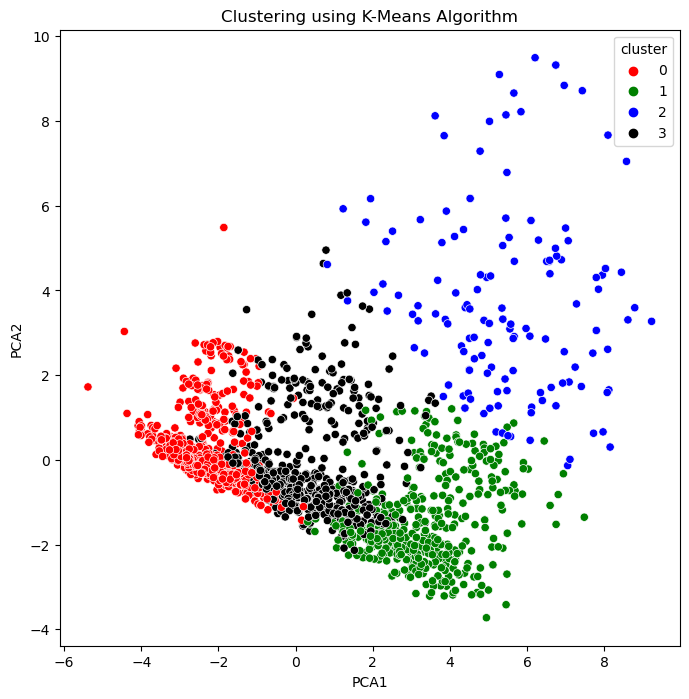

In [99]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [121]:
# find all cluster centers
#cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
#cluster_centers = scalar.inverse_transform(cluster_centers)
#cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
#cluster_centers

In [124]:
#cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
#cluster_df

In [103]:
final_model.labels_

array([1, 2, 1, ..., 3, 3, 2])

In [104]:
df['Label'] = final_model.labels_

In [125]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,Year_Customer,TotalPromotionsAccepted,TotalChildren,Label
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,1617,2012,0,0,1
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,27,2014,0,2,2
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,776,2013,0,0,1
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,2014,0,1,2
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,2014,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,1341,2013,0,1,3
2236,4,5,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,444,2014,1,3,3
2237,2,2,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,1241,2014,1,0,3
2238,3,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,843,2014,0,1,3


In [63]:
#grouping data by labels
grp = df.groupby('Label')

In [64]:
for x,y in grp:
    print(y)
    print('_'*70)

      Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
15            4               4  82800.0        0         0       23   
53            2               2  82582.0        0         0       54   
60            3               4  75777.0        0         0       12   
67            0               4  88194.0        0         1       19   
87            2               4  50388.0        0         1        3   
...         ...             ...      ...      ...       ...      ...   
2171          0               2  65706.0        0         0       77   
2174          2               3  65210.0        0         1       25   
2175          4               3  79174.0        0         0        2   
2193          0               3  82347.0        0         0       38   
2221          3               4  75777.0        0         0       12   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
15        1006         22              115               59  ...   

In [65]:
#Aggregating mean values
grp.agg('mean')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,Year_Customer,TotalPromotionsAccepted,TotalChildren
Label,,,,,,,,,,,,,,,,,,,,,
0,2.610294,3.683824,79631.419118,0.066176,0.220588,48.235294,905.845588,47.955882,407.794118,70.250000,...,0.588235,0.786765,0.639706,0.205882,0.007353,0.683824,1561.985294,2013.029412,2.433824,0.286765
1,2.324731,3.804301,75481.070968,0.032258,0.169892,50.083871,522.107527,72.036559,450.529032,103.916129,...,0.017204,0.113978,0.090323,0.000000,0.006452,0.182796,1297.400000,2013.019355,0.262366,0.202151
2,2.276718,3.712786,35242.390267,0.791031,0.456107,49.330153,44.096374,4.995229,23.974237,7.431298,...,0.007634,0.000000,0.000000,0.001908,0.012405,0.090649,101.179389,2013.126908,0.082061,1.247137
3,2.615520,3.696649,58055.225750,0.222222,0.940035,47.733686,465.423280,23.194004,141.061728,31.291005,...,0.119929,0.003527,0.022928,0.000000,0.007055,0.105820,746.952381,2012.853616,0.215168,1.162257


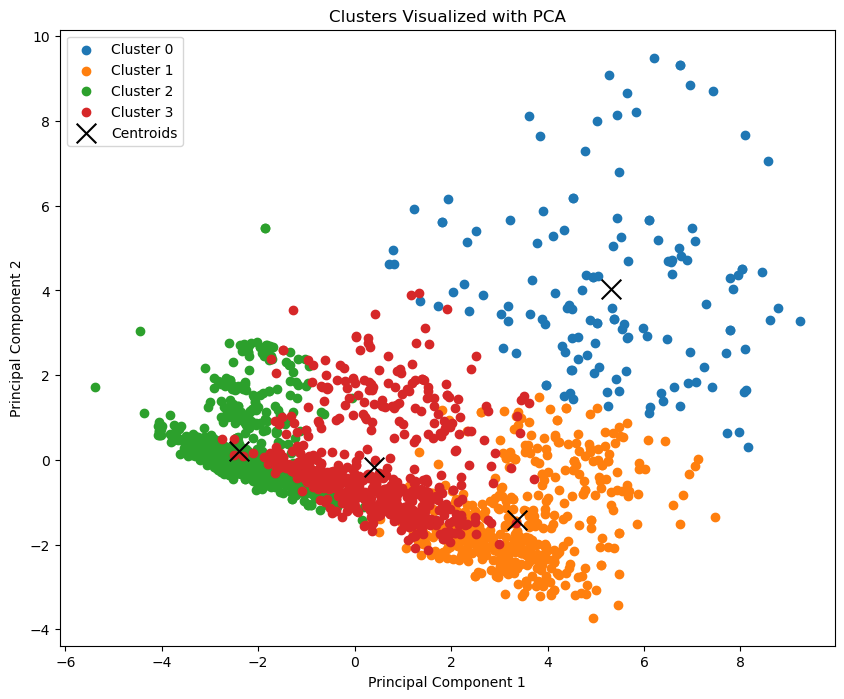

In [66]:
# Visualizing clusters using PCA
plt.figure(figsize=(10, 8))

# Plotting data points with cluster labels
for label in range(4):  # Assuming you have 8 clusters
    plt.scatter(pca_data[df['Label'] == label][:, 0], pca_data[df['Label'] == label][:, 1], label=f'Cluster {label}')

# Plotting cluster centroids
centroids = final_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='Black', label='Centroids')

plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<Axes: xlabel='Label', ylabel='count'>

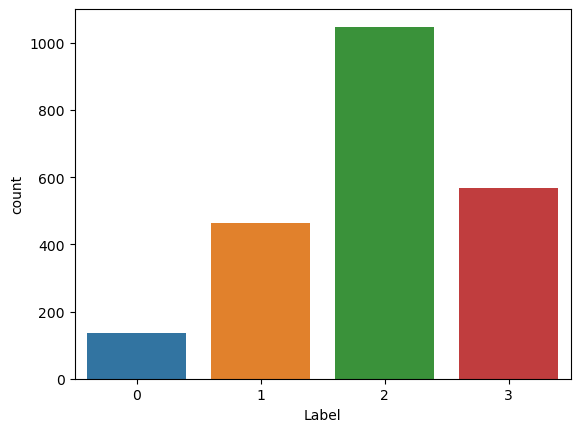

In [127]:
sns.countplot(x='Label', data=df)

Saving the kmeans clustering model and the data with cluster label

In [130]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [132]:
df.to_csv("Clustered_Customer_Data.csv")

In [138]:
#Split Dataset
X = df.drop(['Label'],axis=1)
y= df[['Label']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [139]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [140]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 32   2   0   0]
 [  3 123   1  12]
 [  0   0 311   3]
 [  1  13   8 156]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.89      0.88      0.89       139
           2       0.97      0.99      0.98       314
           3       0.91      0.88      0.89       178

    accuracy                           0.94       665
   macro avg       0.92      0.92      0.92       665
weighted avg       0.93      0.94      0.93       665



# Saving the Decision tree model for future prediction


In [141]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9353383458646617 % Acuuracy
